In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Test

我发的那两个文件 第一列是横坐标 一共六十个 C sigma 和核方法是变量 我想对于RBF核画一个图 线性核画一个图 第二第三列分别用不同颜色来画y 画直方图

In [2]:
result_3 = pd.read_csv('./result_3.csv')
result_4 = pd.read_csv('./result_4.csv')

In [3]:
print(result_3.head())

                          Model  Training_acc  Testing_acc
0  C=0.5,sigma=0.001,RBF kernel      0.883382     0.616216
1           C=0.5,Linear kernel      0.688047     0.654054
2  C=0.5,sigma=0.005,RBF kernel      0.846939     0.740541
3           C=0.5,Linear kernel      0.688047     0.654054
4   C=0.5,sigma=0.01,RBF kernel      0.835277     0.756757


## Generate Figures

In [4]:
def draw_bar_plot(data, title):
    # create plot
    fig, ax = plt.subplots()
    fig.set_figheight(15)
    fig.set_figwidth(100)
    
    index = np.arange(len(data))
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, data['Training_acc'], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Training_acc')

    rects2 = plt.bar(index + bar_width, data['Testing_acc'], bar_width,
                     alpha=opacity,
                     color='g',
                     label='Testing_acc')

    plt.xlabel('Setting')
    plt.ylabel('Scores')
    plt.title(title)
    plt.xticks(index + bar_width, data['Model'])
    plt.legend()

    plt.show()

def generate_diagram(csv_path):
    file = pd.read_csv(csv_path)
    
    RBF_kernel = file[file['Model'].str.contains('RBF kernel')]
    RBF_kernel = RBF_kernel[(RBF_kernel['Model'].str.contains('C=1')) | (RBF_kernel['Model'].str.contains('C=3')) | (RBF_kernel['Model'].str.contains('C=5'))]
    RBF_kernel = RBF_kernel[(RBF_kernel['Model'].str.contains('sigma=0.001')) | (RBF_kernel['Model'].str.contains('sigma=0.01')) | (RBF_kernel['Model'].str.contains('sigma=0.1'))]
    
    Linear_kernel = file[file['Model'].str.contains('Linear kernel')]
    Linear_kernel = Linear_kernel[(Linear_kernel['Model'].str.contains('C=1')) | (Linear_kernel['Model'].str.contains('C=3')) | (Linear_kernel['Model'].str.contains('C=5'))]
    #Linear_kernel = Linear_kernel[(Linear_kernel['Model'].str.contains('sigma=0.001')) | (Linear_kernel['Model'].str.contains('sigma=0.01')) | (Linear_kernel['Model'].str.contains('sigma=0.1'))]
    draw_bar_plot(RBF_kernel, 'RBF kernel')
    draw_bar_plot(Linear_kernel, 'Linear kernel')

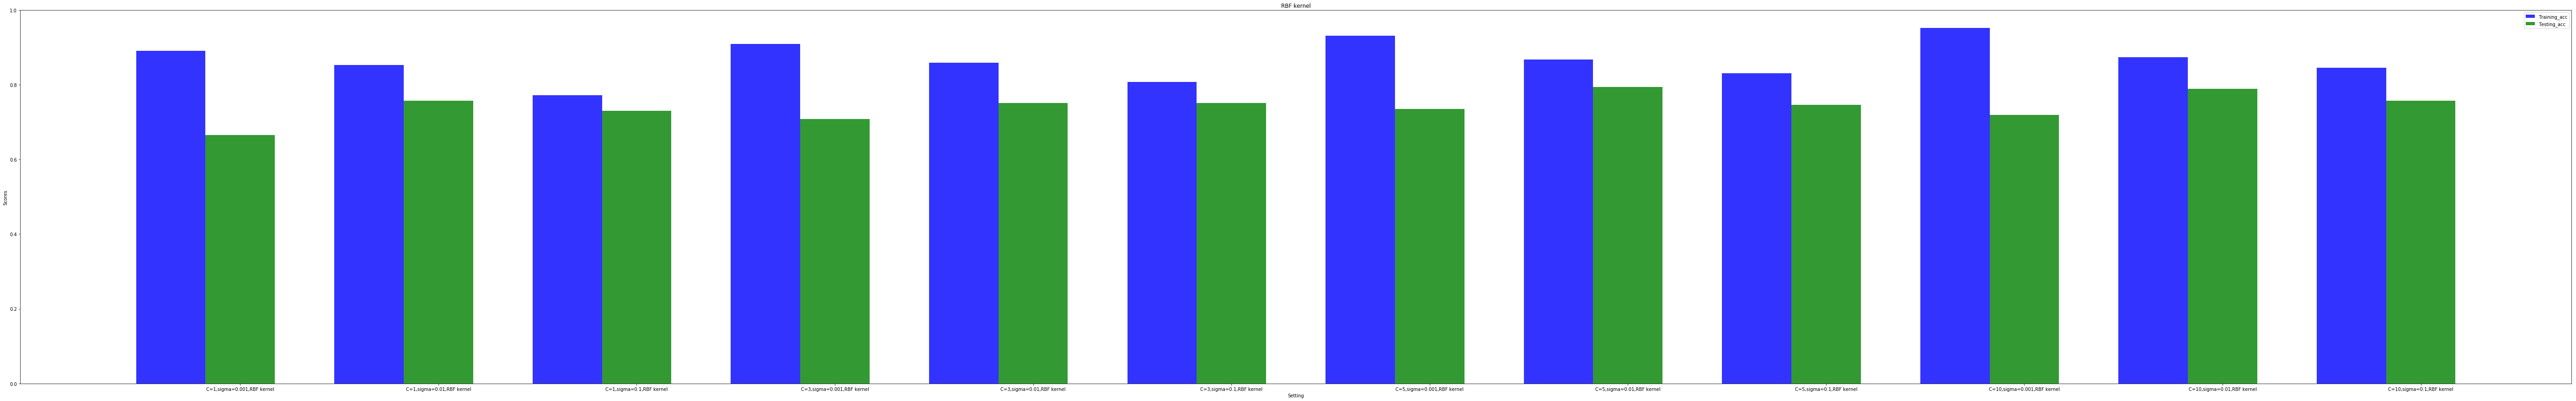

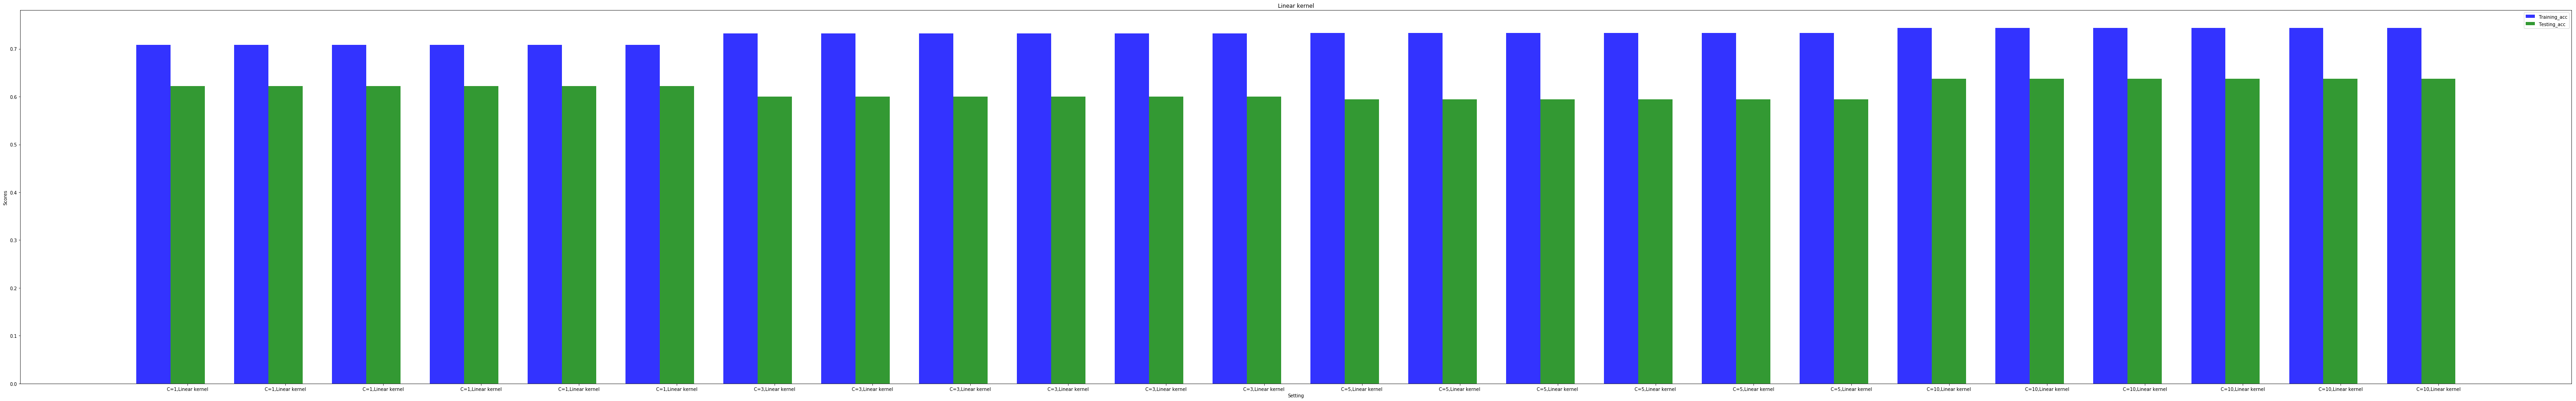

In [5]:
generate_diagram('./result_3.csv')

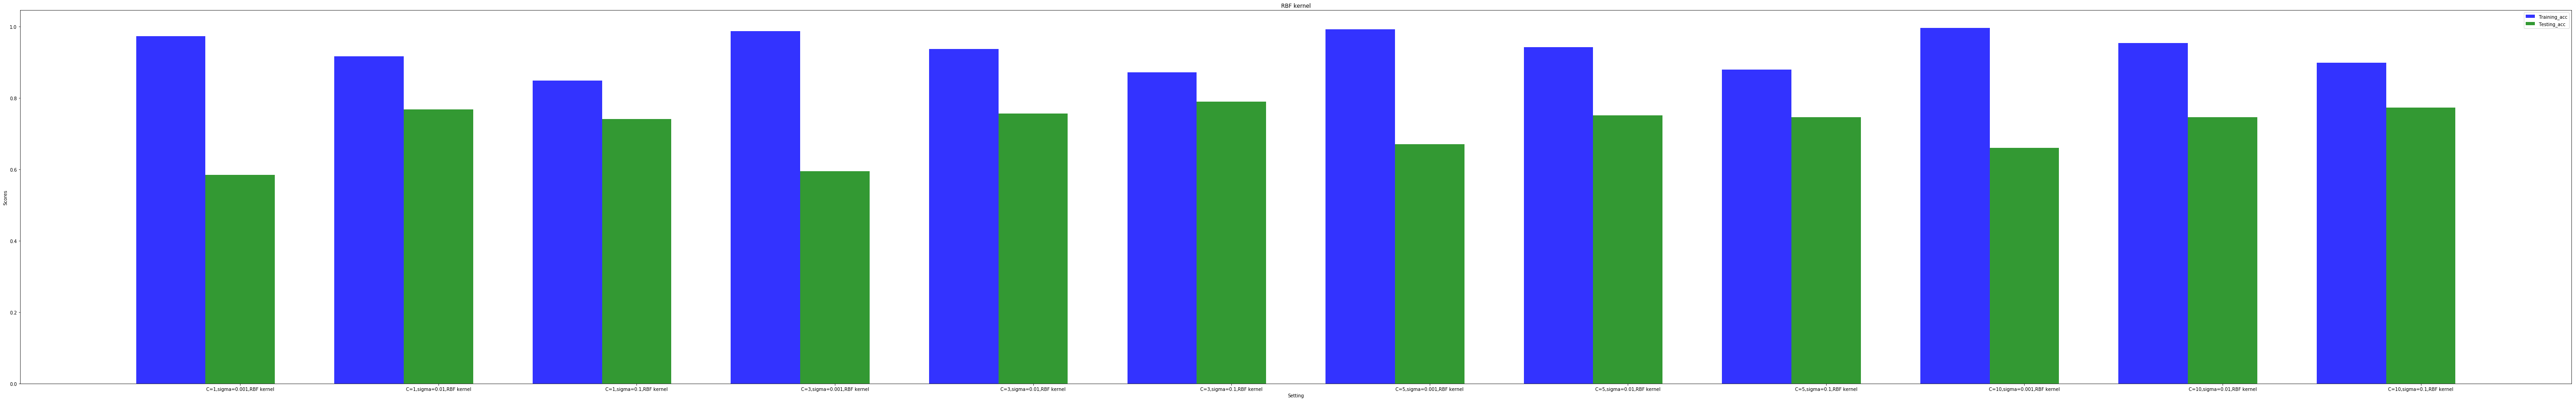

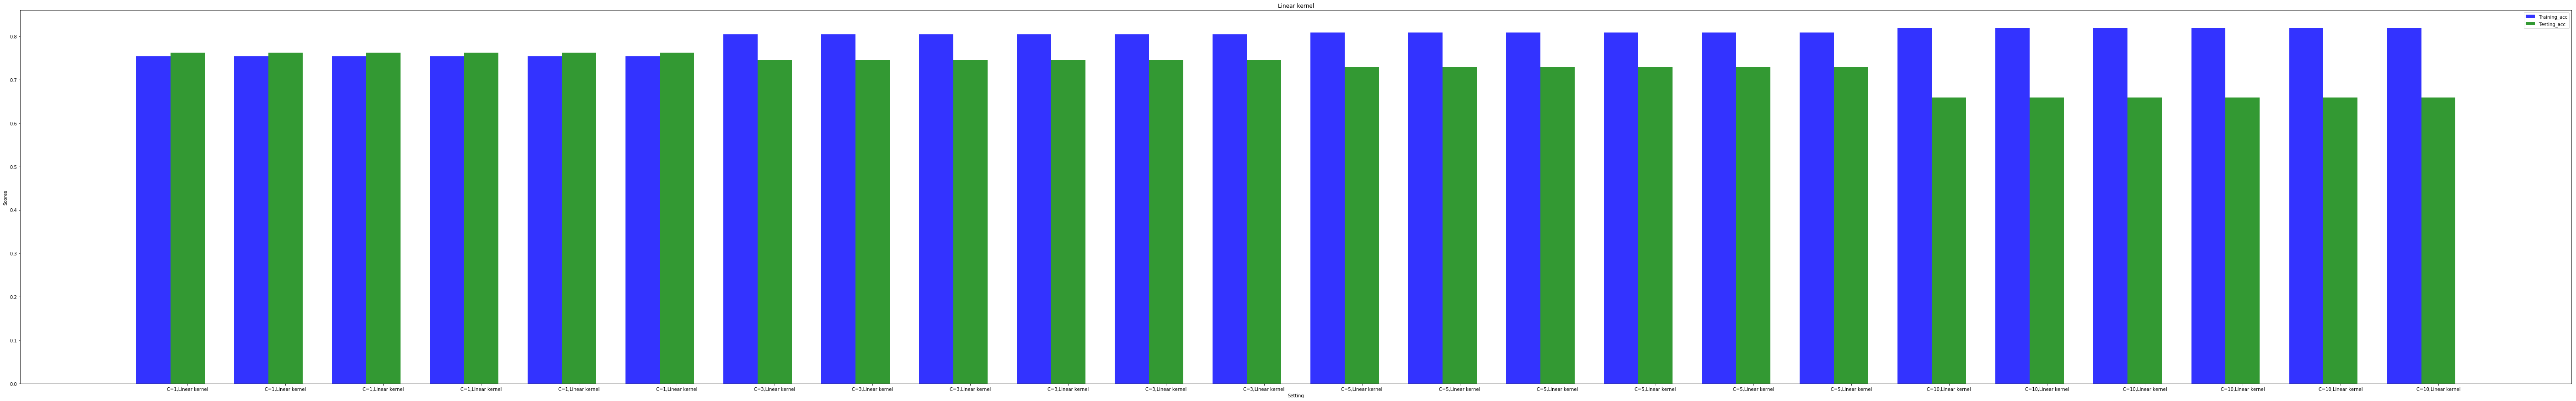

In [6]:
generate_diagram('./result_4.csv')